### Importing Libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score as sil

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data.rename(columns={'ID#' : 'ID', 'Award?':'Award'}, inplace=True)
data.set_index('ID',inplace=True)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Data Exploration

#### Descriptive Statistics

In [3]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [5]:
# diffrent cc_miles have diffrent max values
# so, we want to check what values these columns cn take 

print('unique_cc1',data.cc1_miles.unique())
print('unique_cc2',data.cc2_miles.unique())
print('unique_cc3',data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


### Missing Values

In [6]:
# As a part of the data cleaning we check the data for any missing/ na values
# null count for columns

null_count_col = data.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_present_col = (data.isnull().sum()*100/len(data)).value_counts(ascending=False)

print('Null Count for columns:\n\n',null_count_col,'\n')
print('Null Percentage for columns:\n\n',null_present_col)

Null Count for columns:

 0    11
dtype: int64 

Null Percentage for columns:

 0.0    11
dtype: int64


In [7]:
# null count for rows

null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (data.isnull().sum(axis=1) * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    3999
dtype: int64 

Null Percentage for Rows:

 0.0    3999
dtype: int64


### Duplicated Values

#### print the duplicated rows

In [8]:
data.duplicated().sum()

1

In [9]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [10]:
### There is a one duplicate value in dataset. so We have to drop drop that row

In [11]:
data.drop_duplicates(inplace = True)

In [12]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,


### Exploratory Data Analysis

### Analyzing the features by Histogram to understand the distribution

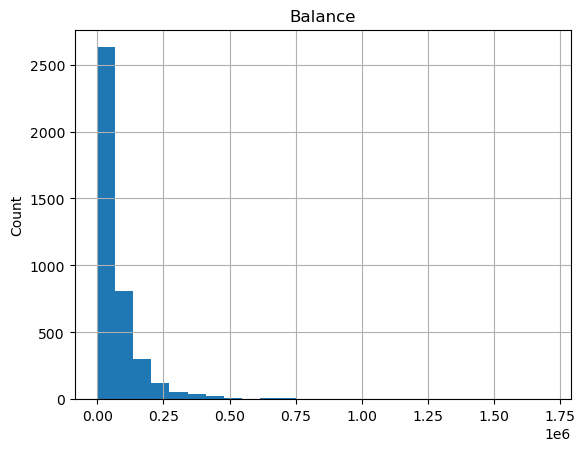

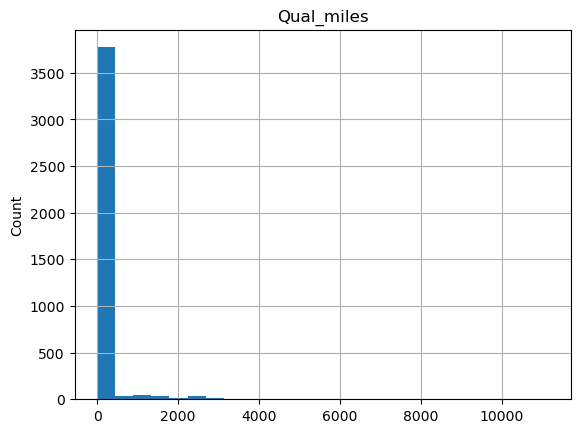

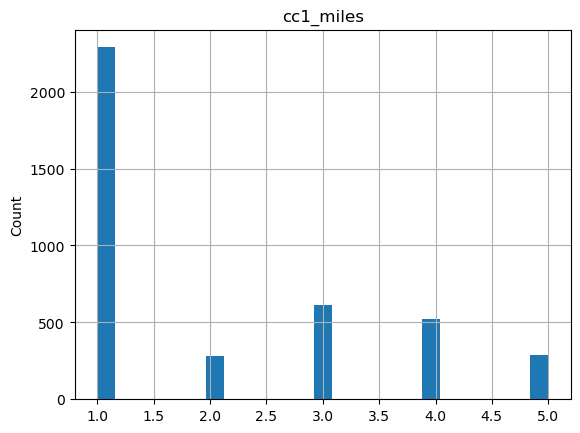

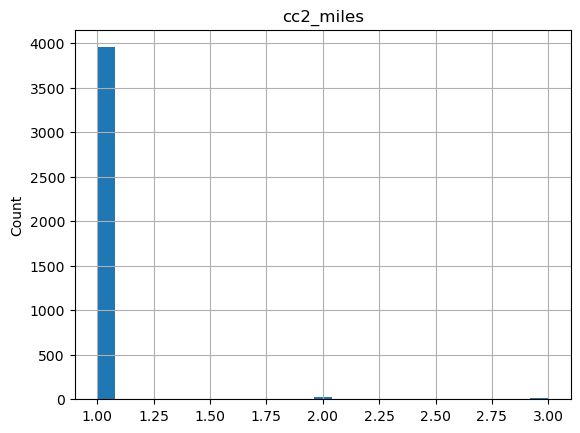

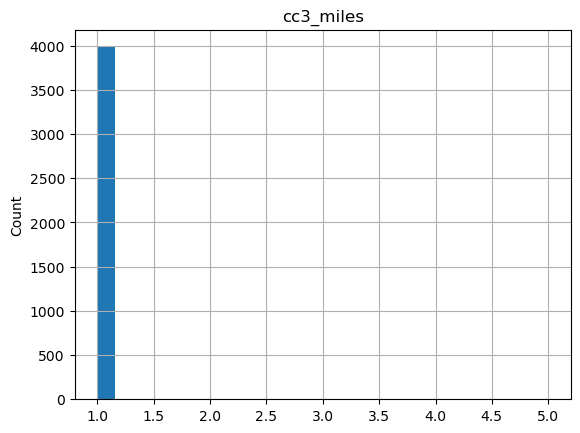

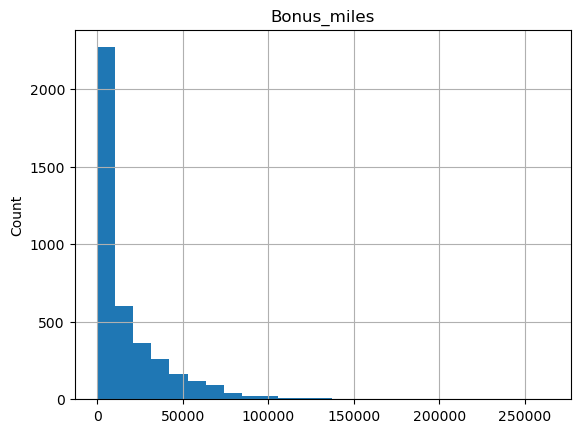

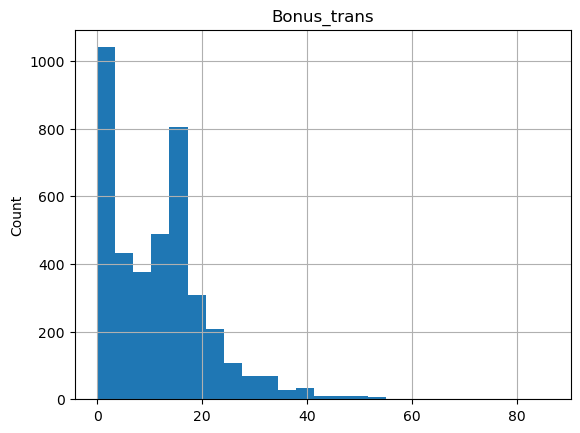

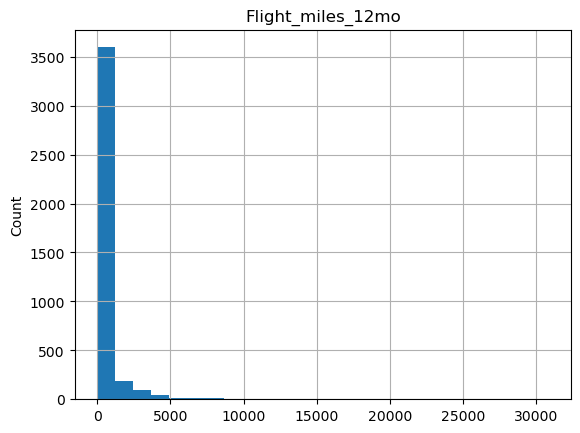

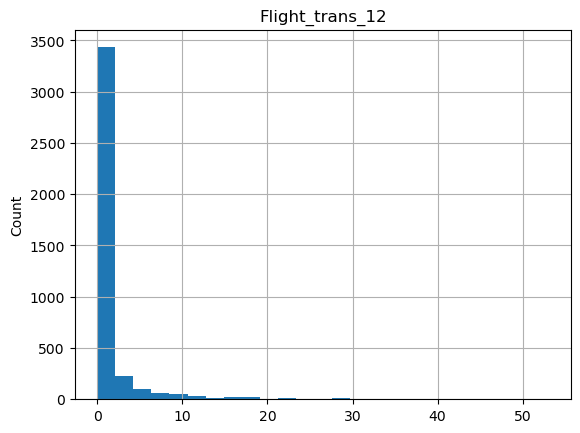

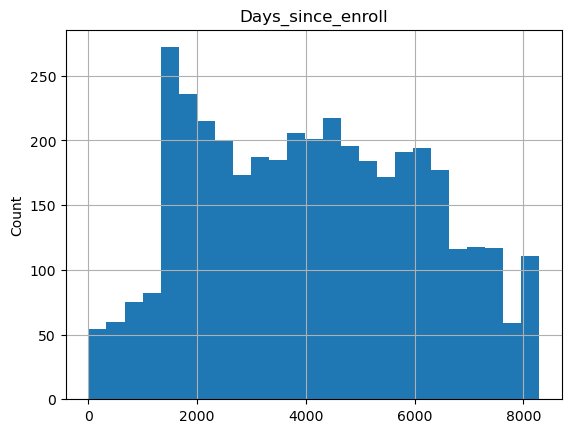

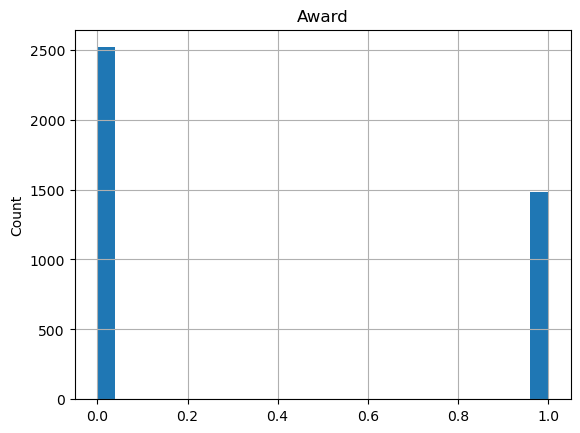

In [13]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Balance


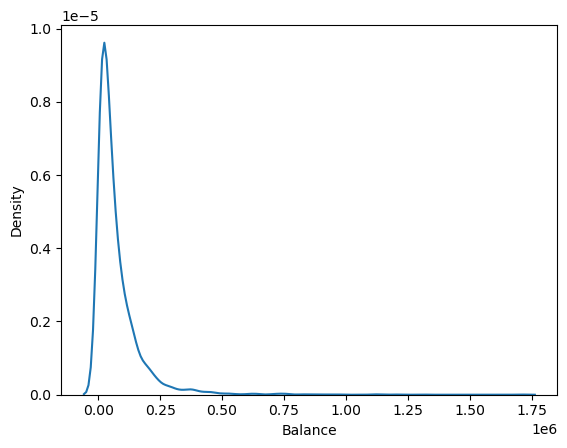

Qual_miles


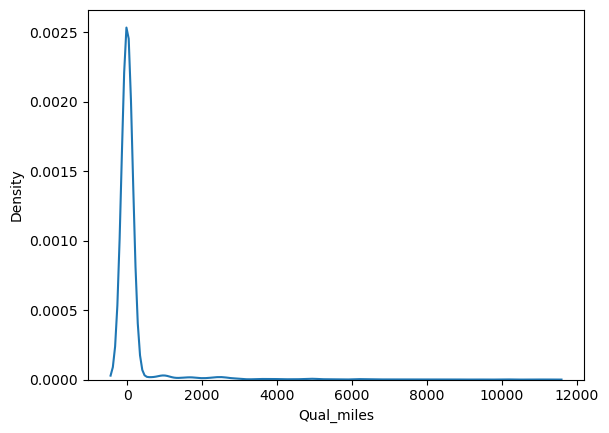

cc1_miles


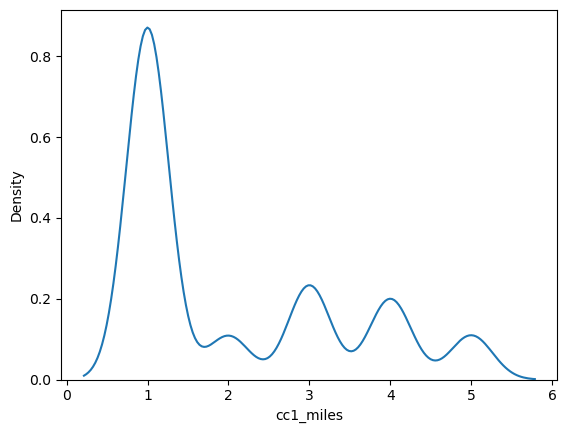

cc2_miles


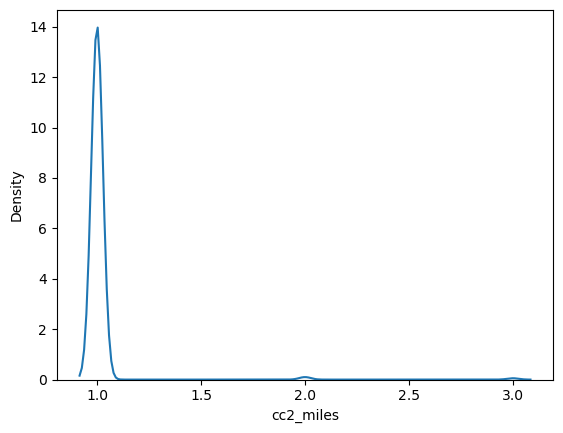

cc3_miles


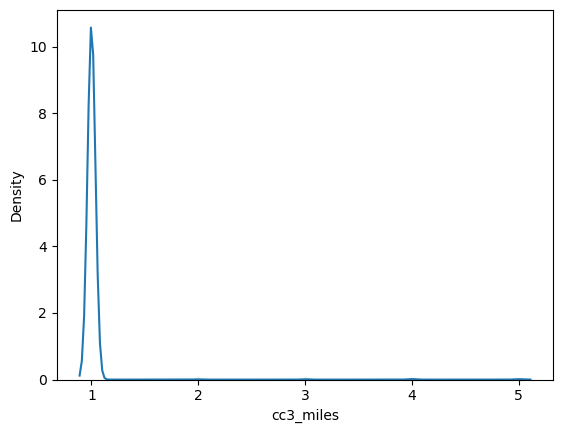

Bonus_miles


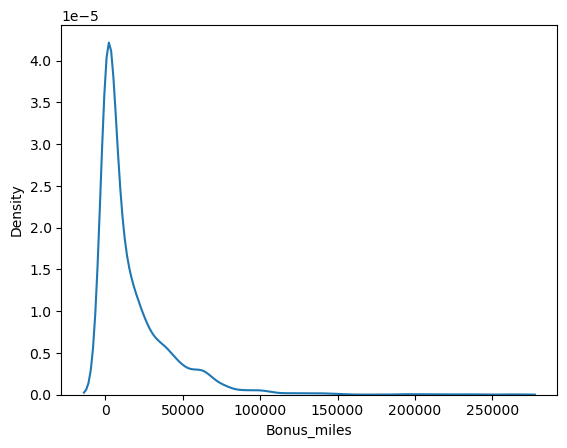

Bonus_trans


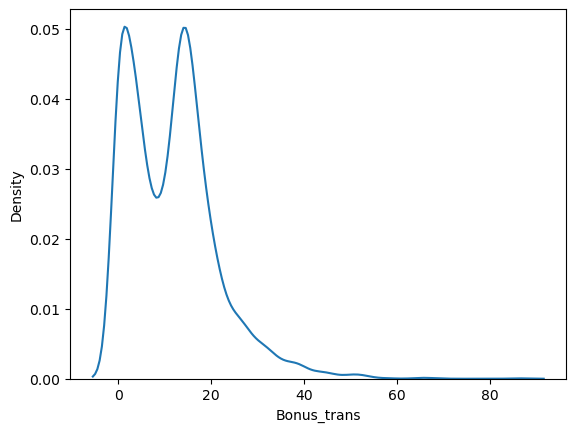

Flight_miles_12mo


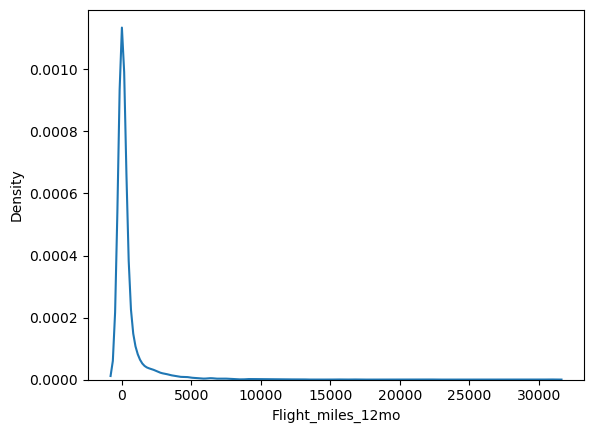

Flight_trans_12


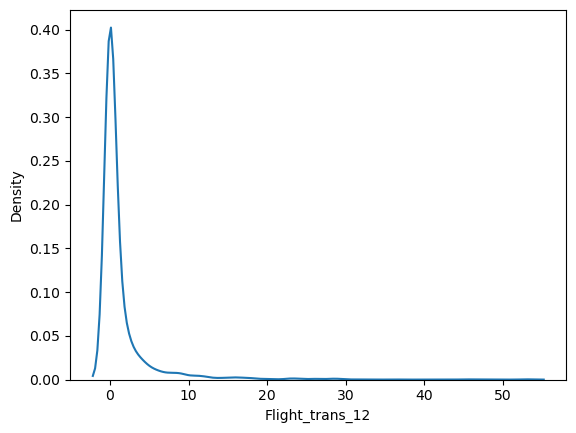

Days_since_enroll


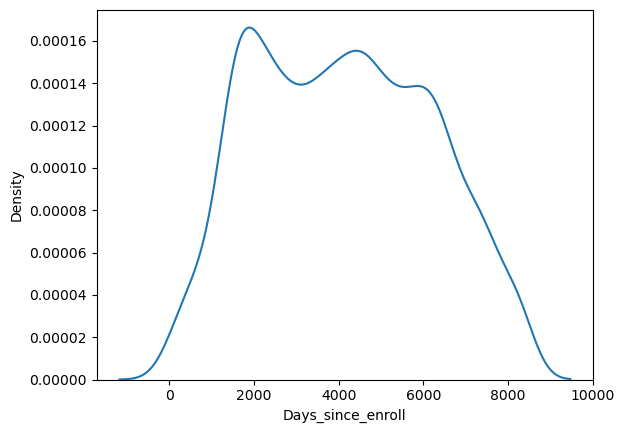

Award


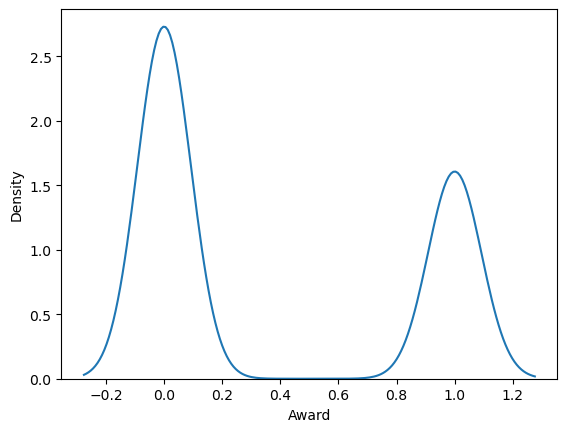

In [14]:
# Kernel Density for every feature, singled out 

for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

### Outliers Detection

In [15]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

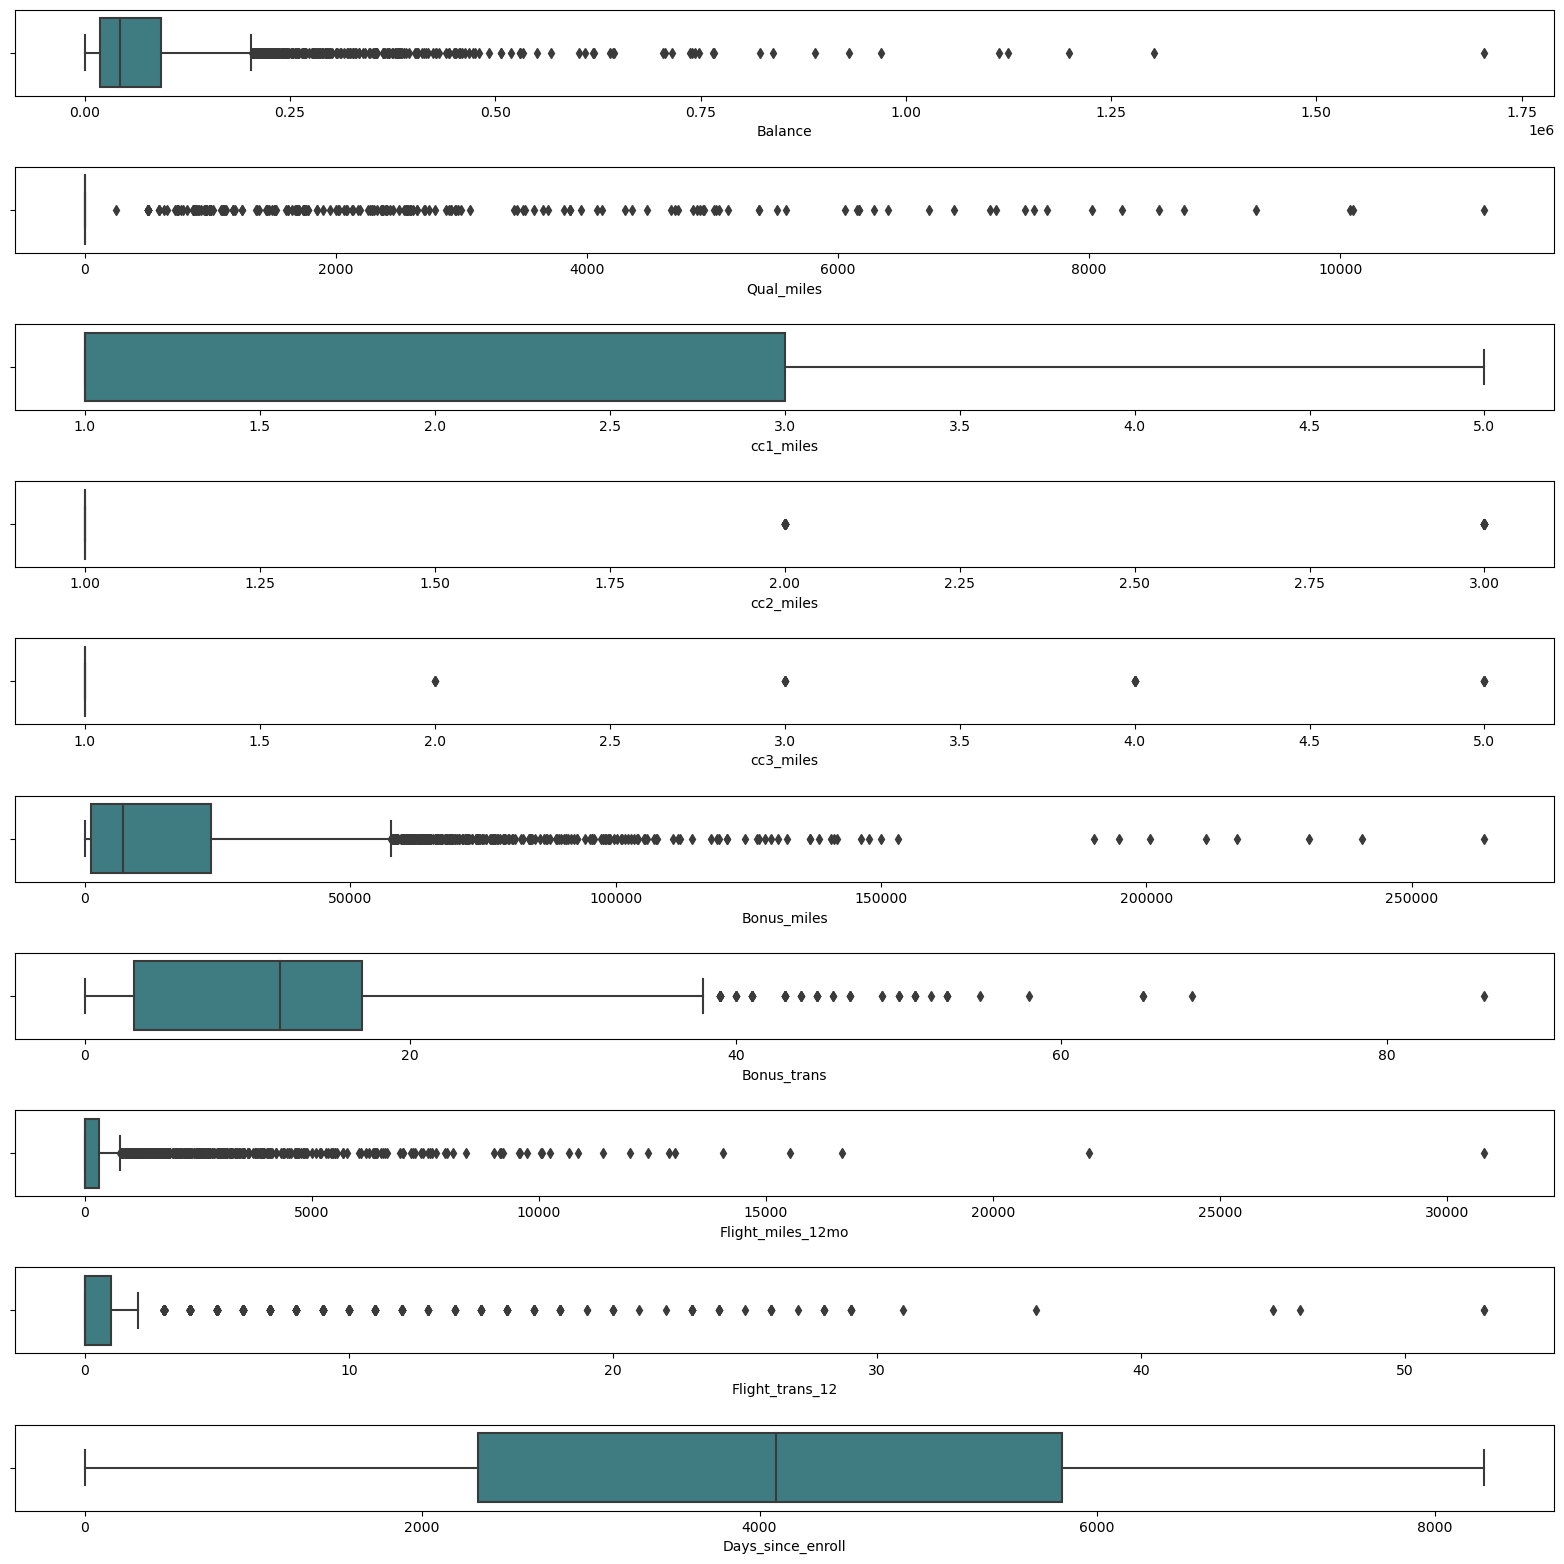

In [16]:
ot=data.copy()
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=ot,palette='crest',ax = axes[0])
sns.boxplot(x='Qual_miles',data=ot,palette='crest',ax = axes[1])
sns.boxplot(x='cc1_miles',data=ot,palette='crest',ax = axes[2])
sns.boxplot(x='cc2_miles',data=ot,palette='crest',ax = axes[3])
sns.boxplot(x='cc3_miles',data=ot,palette='crest',ax = axes[4])
sns.boxplot(x='Bonus_miles',data=ot,palette='crest',ax = axes[5])
sns.boxplot(x='Bonus_trans',data=ot,palette='crest',ax = axes[6])
sns.boxplot(x='Flight_miles_12mo',data=ot,palette='crest',ax = axes[7])
sns.boxplot(x='Flight_trans_12',data=ot,palette='crest',ax = axes[8])
sns.boxplot(x='Days_since_enroll',data=ot,palette='crest',ax = axes[9])
plt.tight_layout(pad=2.0)

In [17]:
# Box plot for every feature in the same graph

<Axes: >

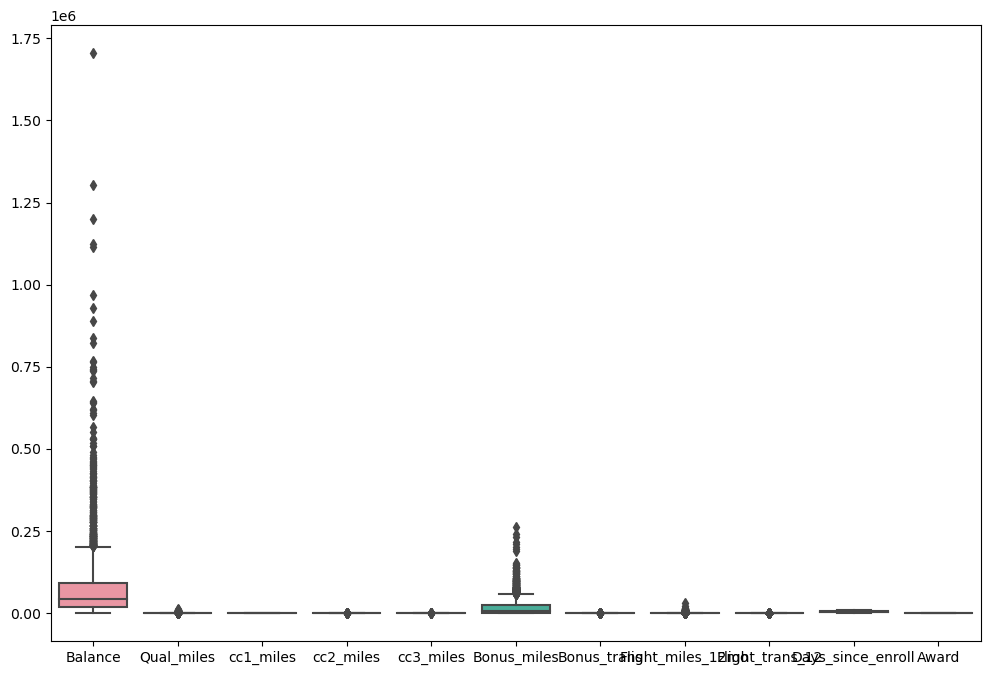

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data)          

<Axes: >

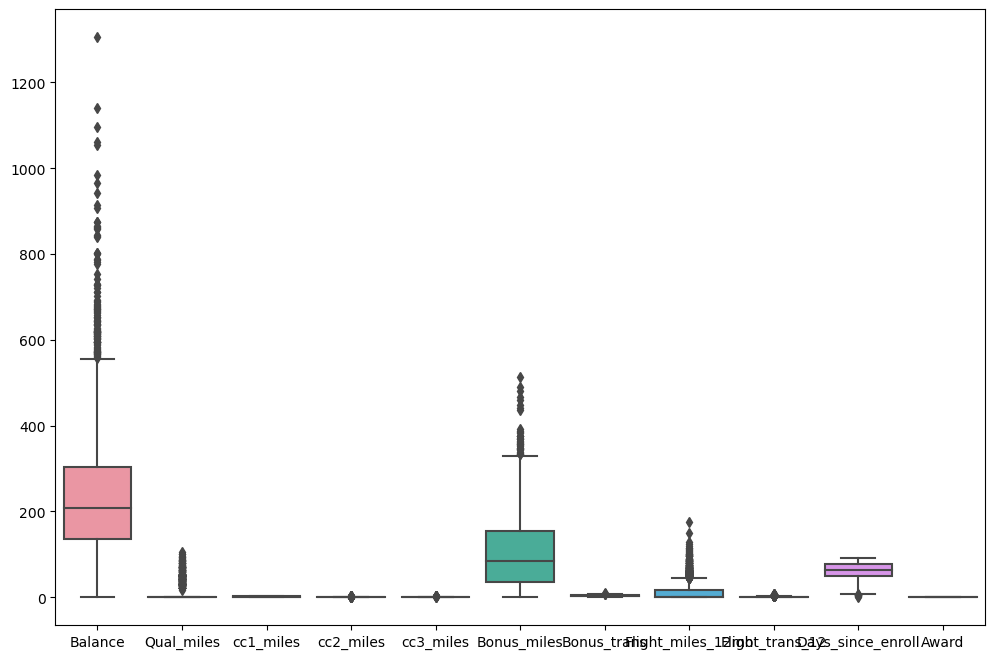

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(data))


### Data Visualization

In [20]:
countNotermdeposit = len(data[data.Award == 0])
counthavetermdeposit = len(data[data.Award == 1])
print('Percentage of Customer doesnt have a Award: {:.2f}%'.format((countNotermdeposit / (len(data.Award))*100))) 
print('Percentage of Customer doesnt have a Award: {:.2f}%'.format((counthavetermdeposit / (len(data.Award))*100))) 

Percentage of Customer doesnt have a Award: 62.96%
Percentage of Customer doesnt have a Award: 37.04%


Text(0.5, 1.0, 'Whether the client has a Award or not')

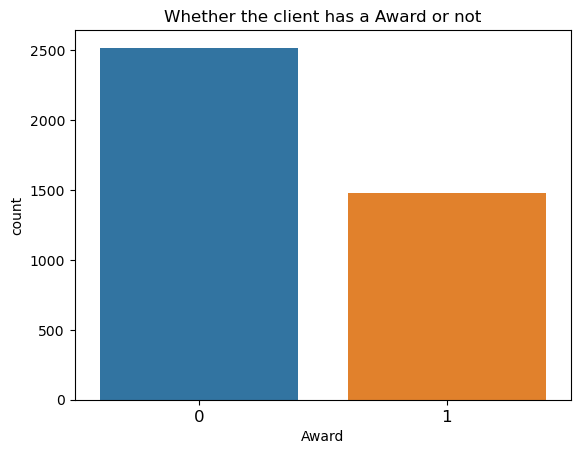

In [21]:
sns.countplot(x='Award',data=data,
              order= data['Award'].value_counts().index)
plt.xticks(fontsize=12)
plt.title('Whether the client has a Award or not')

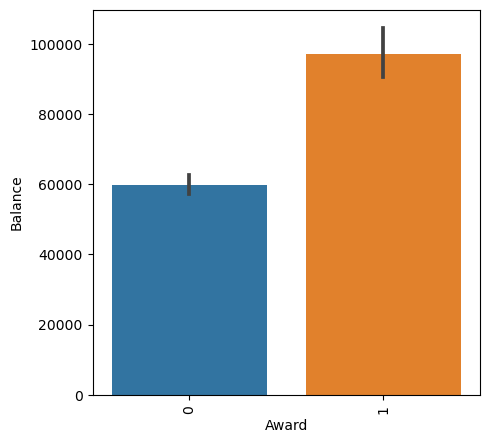

In [22]:
# Balance: Number of milies eligible for award travel

plt.figure(figsize =(5,5))
Balance = data[['Award','Balance']].sort_values('Balance',ascending = False)
ax= sns.barplot(x='Award',y='Balance',data=Balance)
ax.set(xlabel = 'Award',ylabel='Balance')
plt.xticks(rotation=90)
plt.show()

In [23]:
corr_matrix = data.corr()
corr_matrix['Balance'].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403410
cc1_miles            0.338252
Bonus_trans          0.324797
Days_since_enroll    0.262975
Flight_trans_12      0.255656
Flight_miles_12mo    0.217509
Award                0.178380
Qual_miles           0.108696
cc3_miles            0.035234
cc2_miles           -0.008822
Name: Balance, dtype: float64

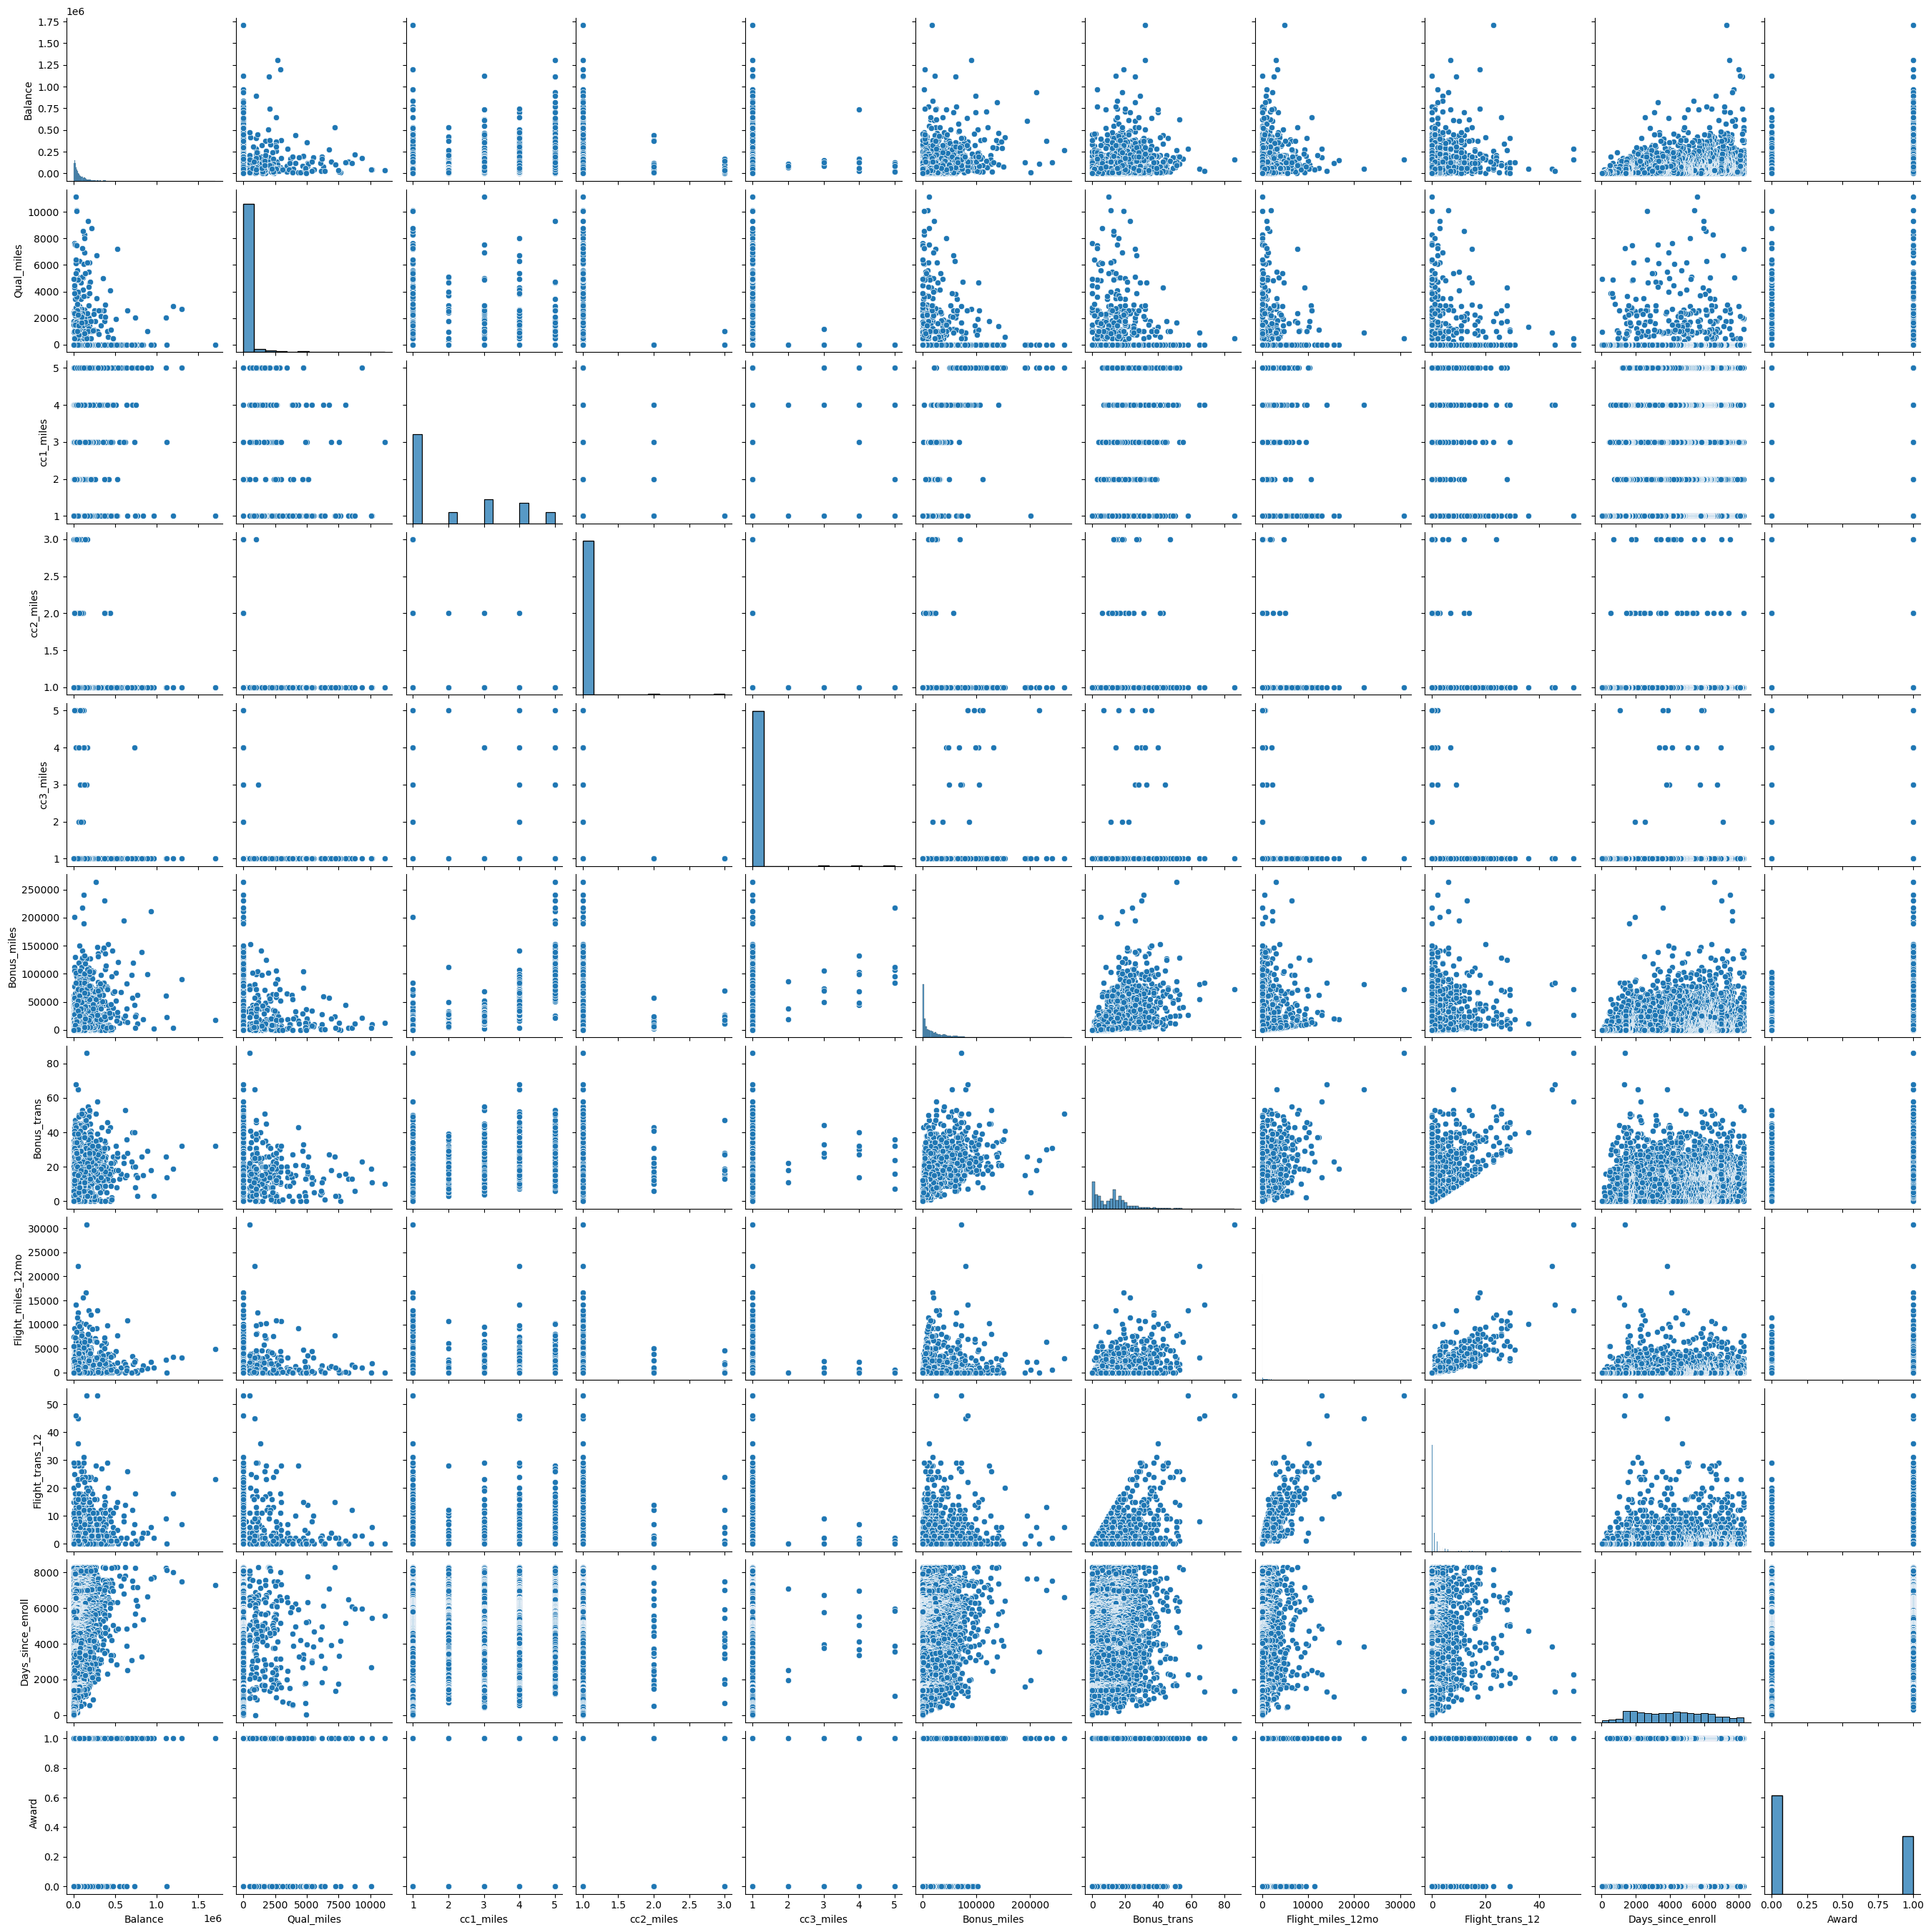

In [30]:

sns.pairplot(data)

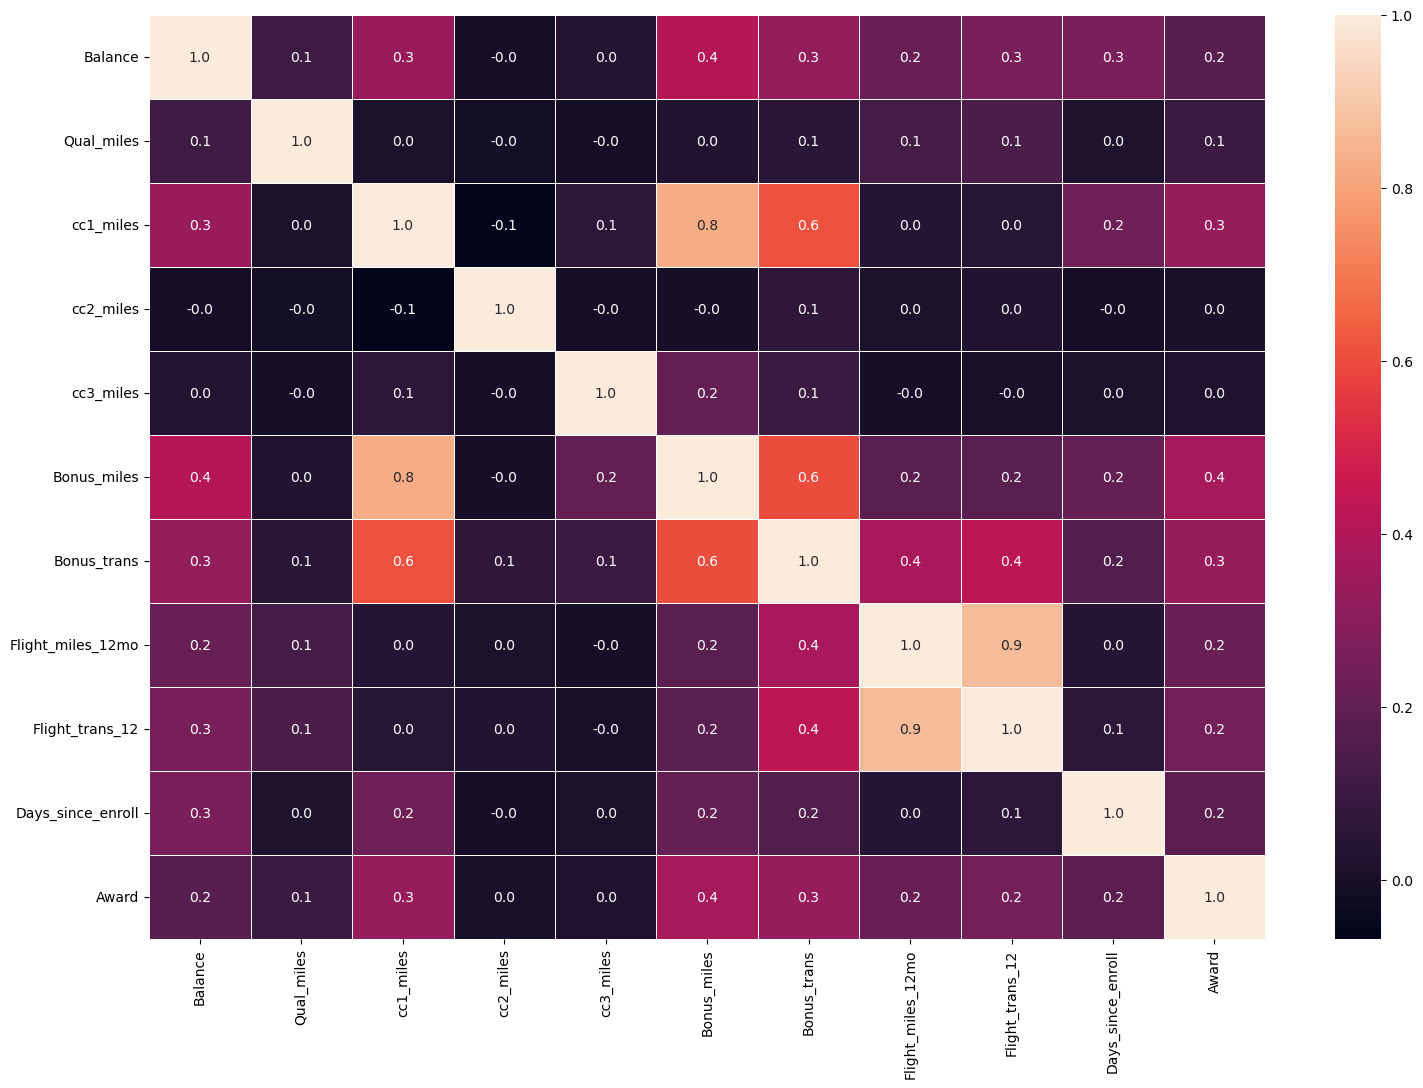

In [31]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

### Unique points in this correlation matrix

+ flight_trans_12 is positively correlated with flight_miles_12mo (Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months)
+ bonus_trans is positively correlated with cc1_miles ( Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions)
+ bonus_trans is positively correlated with bonus_miles ( Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions)
+ bonus_miles is positively correlated with cc1_miles (Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card)

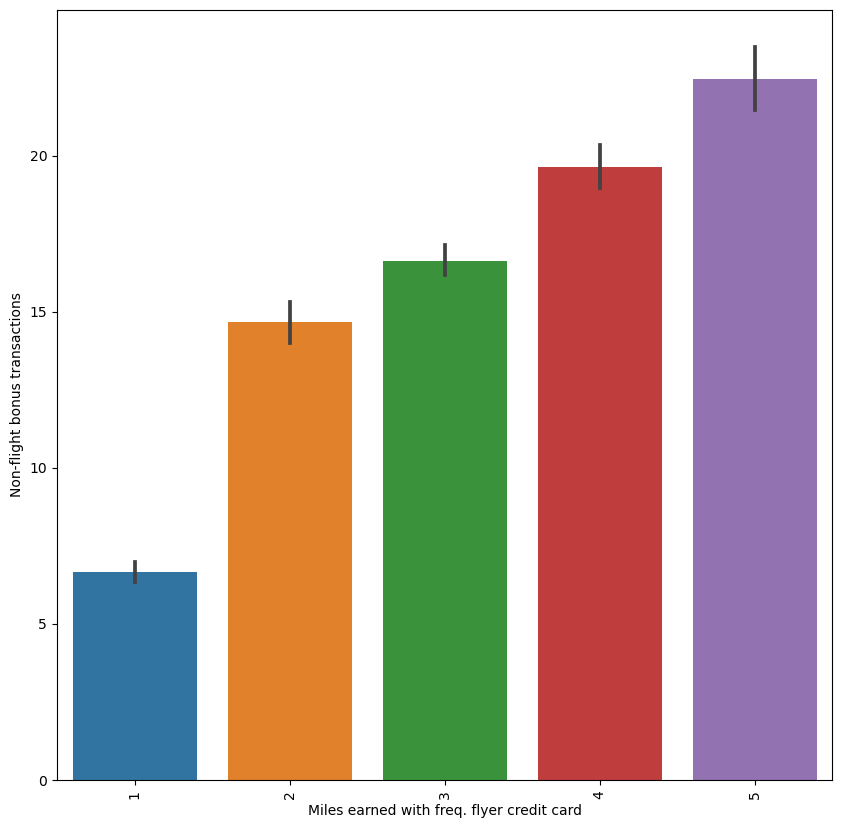

In [32]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

#### People who fly more frequently use bonus transactions  more

### Data Preprocessing 

#### Standardizing the data

In [33]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3998, 11)

### Normalizing the data

In [34]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3998, 11)

### KMeans Clustering

 ### Elbow Method for Determining Cluster Amount

#### Apply Standard Scaler on Data

In [35]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init= 10 )
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors ':cluster_errors})  

clusters_df   

,num_clusters,cluster_errors
0,1,43978.000000
1,2,35402.340928
2,3,30899.983166
3,4,27156.216060
4,5,23697.404373
5,6,21467.049937
6,7,18890.422877
7,8,17314.499688
8,9,15962.774321
9,10,14727.699100


In [36]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    

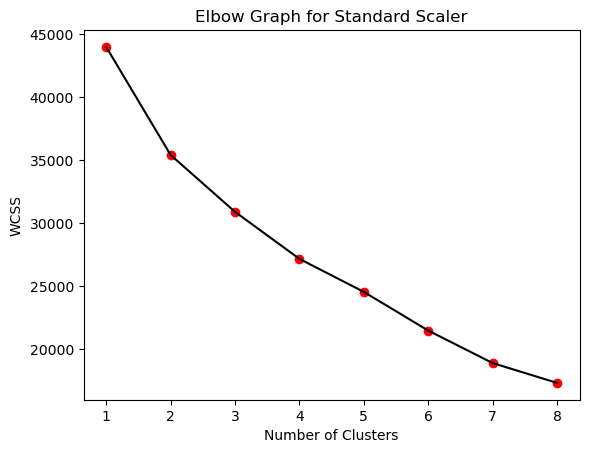

In [38]:
plt.plot(range(1,9),wcss,color='black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### There is no clear 'elbow' visible. A choice of 3 or 4 clusters seems to be fair. Let's see the silhouette score

### Silhouette Score

In [39]:
from  sklearn.metrics import silhouette_score

silhouette_score(std_df,kmeans.fit_predict(std_df))

0.23669847546322711

In [40]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.32531882107641713
For n_clusters = 3 The average silhouette_score is : 0.3120743629337082
For n_clusters = 4 The average silhouette_score is : 0.31003837126661404
For n_clusters = 5 The average silhouette_score is : 0.32371282485521125
For n_clusters = 6 The average silhouette_score is : 0.33378006995858245
For n_clusters = 7 The average silhouette_score is : 0.22365222966492318
For n_clusters = 8 The average silhouette_score is : 0.237314726017899
For n_clusters = 9 The average silhouette_score is : 0.24489425763143474


#### Conclusions:
#### According the silhouette score the standardize data, the ideal number of cluster is 6,with a score higher than other options, of 0.33

### Creating KMeans Cluster algorithm using K=6 and Standard Scaler Applied Dataset

In [41]:
model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3998,)

In [42]:
y_predict_kmeans

array([2, 2, 2, ..., 1, 2, 2])

In [43]:
model_kmeans.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [44]:
model_kmeans.cluster_centers_

array([[ 1.13661978,  0.41416471,  0.13434996, -0.09825429, -0.06277446,
         0.6561826 ,  1.70528239,  3.77057434,  4.00160023,  0.27124922,
         0.88372079],
       [ 0.43360655, -0.11304557,  1.20989562, -0.09825429, -0.05450669,
         0.92790005,  0.75243243, -0.08073137, -0.0896464 ,  0.37051107,
         0.57831847],
       [-0.2944391 , -0.12884258, -0.6016064 , -0.09825429, -0.06072325,
        -0.51689575, -0.49353627, -0.18636708, -0.19846289, -0.19781849,
        -0.34994003],
       [-0.04706705, -0.15626333, -0.66838569,  9.03710982, -0.06277446,
        -0.1018366 ,  0.61758448,  0.08745745,  0.22023229, -0.0727739 ,
         0.0515894 ],
       [ 0.63950059, -0.08446932,  1.02183982, -0.09825429, 15.64433492,
         3.1793166 ,  1.7144102 ,  0.0332068 ,  0.05959833,  0.2395819 ,
         0.33731815],
       [ 0.45689596,  6.73023291, -0.0434189 , -0.09825429, -0.06277446,
         0.06353524,  0.06505958,  0.3595715 ,  0.39411338, -0.07153328,
         0.387

In [45]:
# within-cluster sum of squared
# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 

model_kmeans.inertia_

21086.325857898282

In [46]:
# Assigning clusters to the data set
df = data.copy()
df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
df['Kmeans_label'] = model_kmeans.labels_

In [47]:
# Group data by Clusters (K=6)
df.groupby('Kmeans_label').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,
0,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
1,117176.916331,58.446500,3.720837,1.000000,1.001609,39485.872084,18.811746,346.617860,1.032180,4887.485921,0.649236
2,43899.574007,43.575612,1.229844,1.000000,1.000401,4646.073004,6.855596,199.240273,0.621340,3707.224629,0.200963
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377


### Elbow method and silhouette score on minmaxsacler applied data 

In [52]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,1830.468023
1,2,823.558363
2,3,625.101720
3,4,436.642089
4,5,348.934856
5,6,315.142492
6,7,287.933542
7,8,263.204647
8,9,245.399615
9,10,226.112097


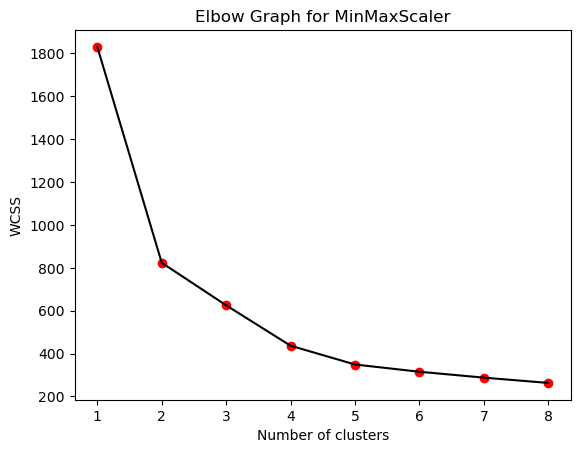

In [53]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

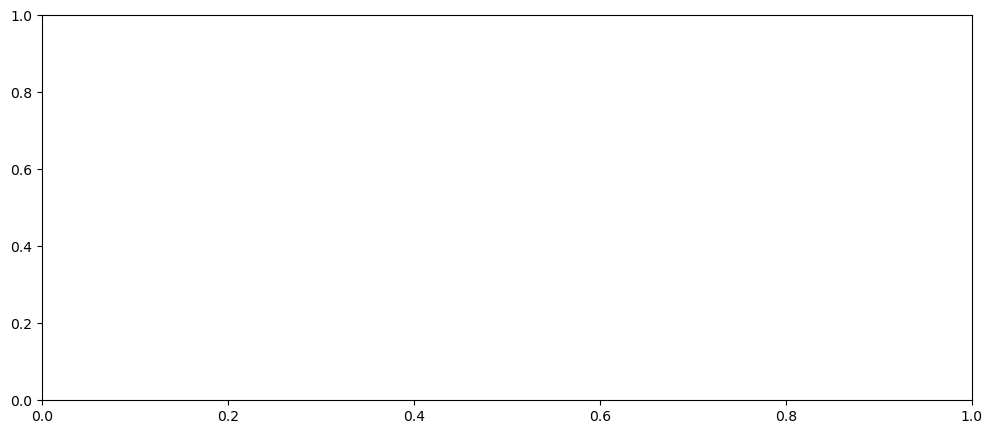

In [58]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(minmax_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(minmax_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='0', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [63]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.535888544052936
For n_clusters = 3 The average silhouette_score is : 0.46479982811211207
For n_clusters = 4 The average silhouette_score is : 0.47479527849897574
For n_clusters = 5 The average silhouette_score is : 0.4429787795230887
For n_clusters = 6 The average silhouette_score is : 0.4036935704266899
For n_clusters = 7 The average silhouette_score is : 0.3902543534131159
For n_clusters = 8 The average silhouette_score is : 0.3800928436109383
For n_clusters = 9 The average silhouette_score is : 0.38422218036747746


### Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset

In [64]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(3998,)

In [65]:
# these are nothing but cluster labels...

y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1])

In [66]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [67]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 5.69280197e-02,  2.15461508e-02,  4.15428764e-01,
         7.76502363e-03,  4.55773126e-03,  1.09621005e-01,
         1.83518364e-01,  2.78255837e-02,  4.90489598e-02,
         5.57398375e-01,  1.00000000e+00],
       [ 3.50949497e-02,  7.86125463e-03,  1.76400477e-01,
         6.95272149e-03,  2.18514104e-03,  3.88029372e-02,
         1.06355850e-01,  7.34601684e-03,  1.23162495e-02,
         4.60517912e-01, -3.27515792e-15]])

In [68]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

823.5583625482057

In [69]:
#Assign clusters to the data set
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
df['Kmeans_label'] = model_kmeans.labels_

ValueError: Length of values (3998) does not match length of index (3999)